In [2]:
import re

Сделаем функцию для предобработки, которой будем потом пользоваться для разных языков. На вход этой функции будет подаваться список строчек, считанных из файла. Берём начиная с 6-й строки, потому что до этого там ненужные строчки, текст собственно декларации начинается с шестой строки.
Функция приводит каждую строку к нижнему регистру, отрезает лишние пробелы по краям, с помощью регулярного выражения заменяет знаки препинания и цифры на пробелы. Потом получившееся разбиваем по пробелам (сколько бы их ни было) и собираем слова в список. Функция возвращает список слов без всего лишнего.

In [3]:
#txt -- это будет список строк из файла
def preprocess(txt):
    words = []
    for line in txt:
        clean_line = re.sub('[\W\d_-]+', ' ', line.lower().strip())
        line_words = re.split(' +', clean_line)
        words += [w for w in line_words if w] 
    return words


In [5]:
#русский
with open("/Users/ika/Downloads/udhr_txt/udhr_rus.txt", 
          encoding="utf-8") as f:
    lines_rus = f.readlines()[6:] 

russian = preprocess(lines_rus)
print(russian[:10])
print(len(russian))
print(len(set(russian)))


['всеобщая', 'декларация', 'прав', 'человека', 'принята', 'и', 'провозглашена', 'резолюцией', 'а', 'iii']
1578
713


In [6]:
# английский
with open("/Users/ika/Downloads/udhr_txt/udhr_eng.txt", 
          encoding="utf-8") as f:
    lines_eng = f.readlines()[6:]
english = preprocess(lines_eng)
print(english[:10])

['universal', 'declaration', 'of', 'human', 'rights', 'preamble', 'whereas', 'recognition', 'of', 'the']


In [7]:
#украинский
with open("/Users/ika/Downloads/udhr_txt/udhr_ukr.txt", 
          encoding="utf-8") as f:
    lines_ukr = f.readlines()[6:]
ukrainian = preprocess(lines_ukr)
print(ukrainian[:10])

   

['загальна', 'декларація', 'прав', 'людині', 'преамбула', 'беручи', 'до', 'уваги', 'що', 'визнання']


In [8]:
#немецкий
with open("/Users/ika/Downloads/udhr_txt/udhr_deu_1996.txt", 
          encoding="utf-8") as f:
    lines_deu = f.readlines()[6:]
german = preprocess(lines_deu)
print(german[:10])

['die', 'allgemeine', 'erklärung', 'der', 'menschenrechte', 'resolution', 'a', 'iii', 'vom', 'präambel']


In [9]:
#датский
with open("/Users/ika/Downloads/udhr_txt/udhr_dan.txt", 
          encoding="utf-8") as f:
    lines_dan = f.readlines()[6:]
danish = preprocess(lines_dan)
print(danish[:10])

['den', 'december', 'vedtog', 'og', 'offentliggjorde', 'fns', 'tredie', 'generalforsamling', 'verdenserklæringen', 'om']


In [10]:
#ирландский
with open("/Users/ika/Downloads/udhr_txt/udhr_gle.txt", 
          encoding="utf-8") as f:
    lines_gle = f.readlines()[6:]
irish = preprocess(lines_gle)
print(irish[:10])

['dearbhú', 'uile', 'choiteann', 'cearta', 'an', 'duine', 'de', 'bhrí', 'gurb', 'é']


In [11]:
#французский
with open("/Users/ika/Downloads/udhr_txt/udhr_fra.txt", 
          encoding="utf-8") as f:
    lines_fra = f.readlines()[6:]
french = preprocess(lines_fra)
print(french[:10])

['déclaration', 'universelle', 'des', 'droits', 'de', 'l', 'homme', 'préambule', 'considérant', 'que']


In [12]:
from collections import Counter

In [13]:
#напишем функцию для топ-300 слов
def top_300(lang):
    lang_words = Counter(lang).most_common(300) #считаем 300 самых частотных слов
    str_lang_words = str(lang_words) # преобразуем список в строку
    clean_str = re.sub(r'\),', r'\n', str_lang_words) #делаем слова в столбик
    very_clean_str = re.sub('[\(\[\]\'\,\)]', '', clean_str) #убираем знаки препинания
    return very_clean_str


#Запишем в файлы топ-300 слов для каждого языка

In [14]:
fl = open('rus.txt', 'w') 
fl.write(top_300(russian)) 
fl.close() 

In [15]:
fl = open('ukr.txt', 'w') 
fl.write(top_300(ukrainian)) 
fl.close() 

In [16]:
fl = open('eng.txt', 'w') 
fl.write(top_300(english)) 
fl.close() 

In [17]:
fl = open('deu.txt', 'w') 
fl.write(top_300(german)) 
fl.close() 

In [18]:
fl = open('dan.txt', 'w') 
fl.write(top_300(danish)) 
fl.close() 

In [19]:
fl = open('gle.txt', 'w')
fl.write(top_300(irish)) 
fl.close() 

In [20]:
fl = open('fra.txt', 'w') 
fl.write(top_300(french)) 
fl.close() 

Сделаем списки биграмм и триграмм для всех языков. 
Функция ngrams будет получать список слов языка и число 2 или 3 и возвращать список би- или триграмм соответственно.
Функция top_300_ngrams будет получать то же самое и возвращать записанные в столбик самые частотные би- и триграммы 
в порядке убывания частотности.

In [21]:
def ngrams(lang, n):
    ngrams = [lang[i:i+n] for i in range(len(lang)-n+1)]
    return ngrams

In [22]:
def top_300_ngrams(lang, n):
    if n == 2:
        lang_bigr = ngrams(lang, n)
        lang_bigrams = []
        for bigram in lang_bigr:
            b = '_'.join(bigram)
            lang_bigrams.append(b)
        lang_bi_300 = Counter(lang_bigrams).most_common(300)
        lang_bi_300_str = str(lang_bi_300)
        clean_bi = re.sub(r'\),', r'\n', lang_bi_300_str) 
        very_clean_bi = re.sub('[\(\[\]\'\,\)]', '', clean_bi)
        return very_clean_bi
    if n == 3:
        lang_trigr = ngrams(lang, 3)
        lang_trigrams = []
        for trigram in lang_trigr:
            t = '_'.join(trigram)
            lang_trigrams.append(t)
        lang_tri_300 = Counter(lang_trigrams).most_common(300)
        lang_tri_300_str = str(lang_tri_300)
        clean_tri = re.sub(r'\),', r'\n', lang_tri_300_str) 
        very_clean_tri = re.sub('[\(\[\]\'\,\)]', '', clean_tri)
        return very_clean_tri
    else:
        return None

Запишем топ-300 биграмм и триграмм в файлики.

                            

In [23]:
fl = open('rus_bi.txt', 'w') 
fl.write(top_300_ngrams(russian, 2)) 
fl.close() 

In [24]:
fl = open('rus_tri.txt', 'w') 
fl.write(top_300_ngrams(russian, 3)) 
fl.close() 

In [25]:
fl = open('ukr_bi.txt', 'w') 
fl.write(top_300_ngrams(ukrainian, 2)) 
fl.close() 

In [26]:
fl = open('ukr_tri.txt', 'w') 
fl.write(top_300_ngrams(ukrainian, 3)) 
fl.close() 

In [27]:
fl = open('eng_bi.txt', 'w') 
fl.write(top_300_ngrams(english, 2)) 
fl.close() 

In [28]:
fl = open('eng_tri.txt', 'w') 
fl.write(top_300_ngrams(english, 3)) 
fl.close() 

In [29]:
fl = open('deu_bi.txt', 'w') 
fl.write(top_300_ngrams(german, 2)) 
fl.close() 

In [30]:
fl = open('deu_tri.txt', 'w') 
fl.write(top_300_ngrams(german, 3)) 
fl.close() 

In [31]:
fl = open('dan_bi.txt', 'w') 
fl.write(top_300_ngrams(danish, 2)) 
fl.close() 

In [32]:
fl = open('dan_tri.txt', 'w') 
fl.write(top_300_ngrams(danish, 3)) 
fl.close() 

In [33]:
fl = open('gle_bi.txt', 'w') 
fl.write(top_300_ngrams(irish, 2)) 
fl.close() 

In [34]:
fl = open('gle_tri.txt', 'w') 
fl.write(top_300_ngrams(irish, 3)) 
fl.close() 

In [35]:
fl = open('fra_bi.txt', 'w') 
fl.write(top_300_ngrams(french, 2)) 
fl.close() 

In [36]:
fl = open('fra_tri.txt', 'w') 
fl.write(top_300_ngrams(french, 3)) 
fl.close() 

In [37]:
def ngrams_list(lang, n):
    lang_ngr = ngrams(lang, n)
    lang_ngrams = []
    for ngram in lang_ngr:
        n = '_'.join(ngram)
        lang_ngrams.append(n)
    return lang_ngrams
print(ngrams_list(danish, 3)[:10])

['den_december_vedtog', 'december_vedtog_og', 'vedtog_og_offentliggjorde', 'og_offentliggjorde_fns', 'offentliggjorde_fns_tredie', 'fns_tredie_generalforsamling', 'tredie_generalforsamling_verdenserklæringen', 'generalforsamling_verdenserklæringen_om', 'verdenserklæringen_om_menneskerettighederne', 'om_menneskerettighederne_erklæringen']


In [38]:
top_rus_bi = Counter(ngrams_list(russian, 2)).most_common(300)
top_rus = set([w[0] for w in top_rus_bi])

In [39]:
top_eng_bi = Counter(ngrams_list(english, 2)).most_common(300)
top_eng = set([w[0] for w in top_eng_bi])

In [40]:
top_ukr_bi = Counter(ngrams_list(ukrainian, 2)).most_common(300)
top_ukr = set([w[0] for w in top_ukr_bi])

In [41]:
top_deu_bi = Counter(ngrams_list(german, 2)).most_common(300)
top_deu = set([w[0] for w in top_deu_bi])

In [42]:
top_dan_bi = Counter(ngrams_list(danish, 2)).most_common(300)
top_dan = set([w[0] for w in top_dan_bi])

In [43]:
top_gle_bi = Counter(ngrams_list(irish, 2)).most_common(300)
top_gle = set([w[0] for w in top_gle_bi])

In [44]:
top_fra_bi = Counter(ngrams_list(french, 2)).most_common(300)
top_fra = set([w[0] for w in top_fra_bi])

Посмотрим, есть ли общие частотные биграммы в разных языках.

In [47]:
print(len(top_fra & top_gle))

0


In [48]:
print(len(top_fra & top_eng))

0


In [49]:
print(len(top_deu & top_dan))
print(top_deu & top_dan)

1
{'artikel_alle'}


In [50]:
print(len(top_rus & top_ukr))
print(top_rus & top_ukr)
rus_ukr_similarity = top_rus & top_ukr

4
{'свободу_слова', 'право_без', 'на_свободу', 'право_на'}


In [51]:
print(len(top_eng & top_gle))

0


In [52]:
print(len(top_eng & top_dan))

0


In [53]:
print(len(top_eng & top_deu))

0


Общих биграмм мало или нет совсем. Сравним топы частотных слов.

In [54]:
rus_words = Counter(russian).most_common(300)
top_rus_words = set([w[0] for w in rus_words])

ukr_words = Counter(ukrainian).most_common(300)
top_ukr_words = set([w[0] for w in ukr_words])

eng_words = Counter(english).most_common(300)
top_eng_words = set([w[0] for w in eng_words])

deu_words = Counter(german).most_common(300)
top_deu_words = set([w[0] for w in deu_words])

fra_words = Counter(french).most_common(300)
top_fra_words = set([w[0] for w in fra_words])

dan_words = Counter(danish).most_common(300)
top_dan_words = set([w[0] for w in dan_words])

gle_words = Counter(irish).most_common(300)
top_gle_words = set([w[0] for w in gle_words])

In [55]:
print(len(top_rus_words & top_ukr_words))
print(top_rus_words & top_ukr_words)

31
{'преамбула', 'воля', 'на', 'не', 'люди', 'народами', 'свобод', 'членам', 'через', 'законом', 'правами', 'то', 'людей', 'без', 'того', 'принципам', 'так', 'правах', 'права', 'для', 'такого', 'при', 'свободу', 'прав', 'в', 'орган', 'слова', 'свою', 'за', 'перед', 'право'}


In [56]:
print(len(top_eng_words & top_deu_words))
print(top_eng_words & top_deu_words)

6
{'an', 'person', 'in', 'a', 'not', 'religion'}


In [57]:
print(len(top_eng_words & top_dan_words))
print(top_eng_words & top_dan_words)

9
{'for', 'national', 'under', 'international', 'have', 'at', 'man', 'social', 'religion'}


In [58]:
print(len(top_dan_words & top_deu_words))
print(top_dan_words & top_deu_words)

13
{'artikel', 'da', 'familie', 'den', 'art', 'alle', 'landes', 'internationale', 'grund', 'land', 'der', 'nationale', 'religion'}


In [59]:
print(len(top_eng_words & top_fra_words))
print(top_eng_words & top_fra_words)

22
{'conscience', 'aspiration', 'association', 'respect', 'race', 'limitation', 'discrimination', 'justice', 'distinction', 'relations', 'oppression', 'religion', 'nations', 'public', 'importance', 'social', 'national', 'international', 'opinion', 'protection', 'a', 'article'}


In [60]:
print(len(top_fra_words & top_deu_words))
print(top_fra_words & top_deu_words)

4
{'religion', 'a', 'nationale', 'des'}


In [62]:
print(len(top_eng_words & top_gle_words))
print(top_eng_words & top_gle_words)

8
{'fear', 'an', 'organ', 'in', 'a', 'as', 'is', 'no'}


In [63]:
print(len(top_fra_words & top_gle_words))
print(top_fra_words & top_gle_words)

5
{'a', 'd', 'le', 'sa', 'de'}


In [64]:
print(len(top_eng_words & top_rus_words))
print(top_eng_words & top_rus_words)

0
set()


Топы слов дают больше пересечений, чем топы биграмм.

Визуализируем матрицу схожести

In [65]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
def make_string(top_words_set):
    lang_ = list(top_words_set)
    result = ' '.join(lang_)
    return result

tops = [top_rus_words, top_ukr_words, top_eng_words, top_deu_words, top_fra_words, top_gle_words, top_dan_words]
texts = list(map(make_string, tops))
print(len(texts))
print(type(texts[-1]))


7
<class 'str'>


In [67]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

tfidf = vectorizer.fit_transform(texts)
print("tfidf shape:", tfidf.shape)

tfidf shape: (7, 1973)


In [68]:
from sklearn.metrics.pairwise import cosine_similarity

In [69]:
similarities = cosine_similarity(tfidf)
print(similarities.shape)
print(similarities)

(7, 7)
[[ 1.          0.07291204  0.          0.00238814  0.          0.          0.        ]
 [ 0.07291204  1.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.00955579  0.04768015  0.015483
   0.01851255]
 [ 0.00238814  0.          0.00955579  1.          0.0054637   0.00758481
   0.02848086]
 [ 0.          0.          0.04768015  0.0054637   1.          0.0065794
   0.01731928]
 [ 0.          0.          0.015483    0.00758481  0.0065794   1.
   0.00587118]
 [ 0.          0.          0.01851255  0.02848086  0.01731928  0.00587118
   1.        ]]


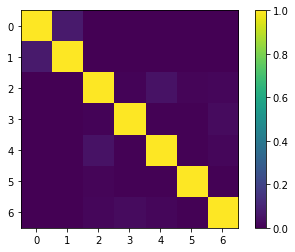

In [70]:
%matplotlib inline

plt.imshow(similarities)
plt.colorbar()
plt.show()

Наблюдается небольшое сходство между нулевым и первым языком (русским и украинским), вторым и четвёртым (английским и французским).

Бонус<br>
Скачаем из Википедии статью о Декларации на наших семи языках.

In [72]:
import wikipedia

In [73]:
wikipedia.set_lang("ru")

In [75]:
decl_rus = wikipedia.page("Всеобщая декларация прав человека")

In [77]:
fl = open('decl_rus.txt', 'w') 
fl.write(decl_rus.content) 
fl.close() 

In [78]:
wikipedia.set_lang("en")

In [79]:
decl_eng = wikipedia.page("Universal declaration of human rights")
fl = open('decl_eng.txt', 'w') 
fl.write(decl_eng.content) 
fl.close() 

In [80]:
wikipedia.set_lang("uk")

In [81]:
decl_ukr = wikipedia.page("Загальна Декларація Прав Людини")
fl = open('decl_ukr.txt', 'w') 
fl.write(decl_ukr.content) 
fl.close() 

In [82]:
wikipedia.set_lang("de")

In [83]:
decl_deu = wikipedia.page("Allgemeine Erklärung der Menschenrechte")
fl = open('decl_deu.txt', 'w') 
fl.write(decl_deu.content) 
fl.close() 

In [84]:
wikipedia.set_lang("da")

In [85]:
decl_dan = wikipedia.page("FN's Verdenserklæring om Menneskerettighederne")
fl = open('decl_dan.txt', 'w') 
fl.write(decl_dan.content) 
fl.close() 

In [86]:
wikipedia.set_lang("fr")

In [87]:
decl_fra = wikipedia.page("Déclaration universelle des droits de l'Homme")
fl = open('decl_fra.txt', 'w') 
fl.write(decl_fra.content) 
fl.close() 

In [88]:
wikipedia.set_lang("ga")

In [89]:
decl_gle = wikipedia.page("Dearbhú Uilechoiteann Chearta an Duine")
fl = open('decl_gle.txt', 'w') 
fl.write(decl_gle.content) 
fl.close() 

Соберём топ-300 слов из статей.

In [90]:
with open("/Users/ika/Downloads/decl_rus.txt", 
          encoding="utf-8") as f:
    lines_decl_rus = f.readlines() 

decl_russian = preprocess(lines_decl_rus)
decl_rus_words = Counter(decl_russian).most_common(300)
top_decl_rus_words = set([w[0] for w in decl_rus_words])

In [91]:
with open("/Users/ika/Downloads/decl_ukr.txt", 
          encoding="utf-8") as f:
    lines_decl_ukr = f.readlines() 

decl_ukrainian = preprocess(lines_decl_ukr)
decl_ukr_words = Counter(decl_ukrainian).most_common(300)
top_decl_ukr_words = set([w[0] for w in decl_ukr_words])

In [92]:
with open("/Users/ika/Downloads/decl_eng.txt", 
          encoding="utf-8") as f:
    lines_decl_eng = f.readlines() 

decl_english = preprocess(lines_decl_eng)
decl_eng_words = Counter(decl_english).most_common(300)
top_decl_eng_words = set([w[0] for w in decl_eng_words])

In [93]:
with open("/Users/ika/Downloads/decl_dan.txt", 
          encoding="utf-8") as f:
    lines_decl_dan = f.readlines() 

decl_danish = preprocess(lines_decl_dan)
decl_dan_words = Counter(decl_danish).most_common(300)
top_decl_dan_words = set([w[0] for w in decl_dan_words])

In [94]:
with open("/Users/ika/Downloads/decl_fra.txt", 
          encoding="utf-8") as f:
    lines_decl_fra = f.readlines() 

decl_french = preprocess(lines_decl_fra)
decl_fra_words = Counter(decl_french).most_common(300)
top_decl_fra_words = set([w[0] for w in decl_fra_words])

In [95]:
with open("/Users/ika/Downloads/decl_deu.txt", 
          encoding="utf-8") as f:
    lines_decl_deu = f.readlines() 

decl_german = preprocess(lines_decl_deu)
decl_deu_words = Counter(decl_german).most_common(300)
top_decl_deu_words = set([w[0] for w in decl_deu_words])

In [96]:
with open("/Users/ika/Downloads/decl_gle.txt", 
          encoding="utf-8") as f:
    lines_decl_gle = f.readlines() 

decl_irish = preprocess(lines_decl_gle)
decl_gle_words = Counter(decl_irish).most_common(300)
top_decl_gle_words = set([w[0] for w in decl_gle_words])

Сравним топы

In [97]:
print(len(top_rus_words & top_decl_rus_words))
print(top_rus_words & top_decl_rus_words)

69
{'правам', 'на', 'как', 'люди', 'не', 'наций', 'декларация', 'был', 'генеральной', 'его', 'которые', 'чтобы', 'быть', 'их', 'к', 'все', 'создание', 'с', 'этих', 'декабря', 'бы', 'это', 'то', 'было', 'без', 'и', 'либо', 'года', 'провозглашает', 'от', 'иметь', 'основе', 'просвещения', 'во', 'по', 'членов', 'правах', 'так', 'а', 'или', 'права', 'резолюцией', 'организации', 'при', 'для', 'декларации', 'они', 'декларацию', 'время', 'ассамблеи', 'тем', 'международного', 'всех', 'свободу', 'прав', 'в', 'своих', 'право', 'свою', 'всеобщая', 'за', 'что', 'iii', 'перед', 'является', 'человека', 'государств', 'свободы', 'мира'}


In [98]:
decl_tops = [top_decl_rus_words, top_decl_ukr_words, top_decl_eng_words, top_decl_deu_words, top_decl_fra_words, top_decl_gle_words, top_decl_dan_words]
decl_texts = list(map(make_string, decl_tops))
print(len(decl_texts))
print(type(texts[-1]))

7
<class 'str'>


In [99]:
more_texts = texts + decl_texts
print(type(more_texts))
print(len(more_texts))

<class 'list'>
14


In [100]:
tfidf_2 = vectorizer.fit_transform(more_texts)
print("tfidf shape:", tfidf_2.shape)

tfidf shape: (14, 3077)


In [101]:
more_similarities = cosine_similarity(tfidf_2)
print(more_similarities.shape)

(14, 14)


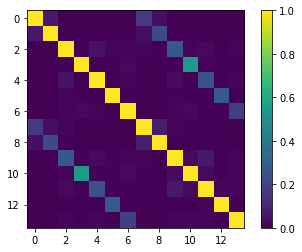

In [102]:
%matplotlib inline

plt.imshow(more_similarities)
plt.colorbar()
plt.show()

In [103]:
lingvoj = ["Русский", "Украинский", "Английский", "Немецкий", "Французский", "Ирландский", "Датский", "Русский", "Украинский", "Английский", "Немецкий", "Французский", "Ирландский", "Датский"]
numbers = range(14)
table = list(zip(numbers, lingvoj))
print(table)

[(0, 'Русский'), (1, 'Украинский'), (2, 'Английский'), (3, 'Немецкий'), (4, 'Французский'), (5, 'Ирландский'), (6, 'Датский'), (7, 'Русский'), (8, 'Украинский'), (9, 'Английский'), (10, 'Немецкий'), (11, 'Французский'), (12, 'Ирландский'), (13, 'Датский')]


Видно, что больше всех похож немецкий на немецкий, а самое маленькое пересечение -- у датского языка.

In [104]:
print(len(top_deu_words & top_decl_deu_words))
print('%.2f'%(len(top_deu_words & top_decl_deu_words) / 300 *100), '%')

184
61.33 %


In [105]:
print(len(top_gle_words & top_decl_gle_words))
print('%.2f'%(len(top_gle_words & top_decl_gle_words) / 300 *100), '%')

109
36.33 %


In [106]:
print(len(top_dan_words & top_decl_dan_words))
print('%.2f'%(len(top_dan_words & top_decl_dan_words) / 300 *100), '%')

42
14.00 %


In [107]:
print(len(top_ukr_words & top_decl_ukr_words))
print('%.2f'%(len(top_ukr_words & top_decl_ukr_words) / 300 *100), '%')

91
30.33 %


In [108]:
print(len(top_fra_words & top_decl_fra_words))
print('%.2f'%(len(top_fra_words & top_decl_fra_words) / 300 *100), '%')

97
32.33 %


In [109]:
print(len(top_eng_words & top_decl_eng_words))
print('%.2f'%(len(top_eng_words & top_decl_eng_words) / 300 *100), '%')

106
35.33 %


Посмотрим, что будет, если сравнивать только с небольшим кусочком текста статьи из Википедии.

In [110]:
german_short = decl_german[100:200]
german_short_set = set(german_short)
print(len(german_short_set))
print(len(german_short_set & top_deu_words))
print('%.2f'%(len(german_short_set & top_deu_words) / len(german_short_set) *100), '%')

76
47
61.84 %


In [111]:
german_short_1 = decl_german[200:300]
german_short_set_1 = set(german_short_1)
print(len(german_short_set_1))
print(len(german_short_set_1 & top_deu_words))
print('%.2f'%(len(german_short_set_1 & top_deu_words) / len(german_short_set_1) *100), '%')

76
32
42.11 %


In [112]:
german_short_2 = decl_german[300:400]
german_short_set_2 = set(german_short_2)
print(len(german_short_set_2))
print(len(german_short_set_2 & top_deu_words))
print('%.2f'%(len(german_short_set_2 & top_deu_words) / len(german_short_set_2) *100), '%')

77
22
28.57 %


In [113]:
german_very_short = decl_german[450:475]
german_very_short_set = set(german_very_short)
print(len(german_very_short_set))
print(len(german_very_short_set & top_deu_words))
print('%.2f'%(len(german_very_short_set & top_deu_words) / len(german_very_short_set) *100), '%')
print(german_very_short)

22
15
68.18 %
['durch', 'die', 'mitgliedsstaaten', 'der', 'vereinten', 'nationen', 'ist', 'eine', 'direkte', 'reaktion', 'auf', 'die', 'schrecklichen', 'ereignisse', 'des', 'zweiten', 'weltkriegs', 'in', 'dem', 'die', 'nichtanerkennung', 'und', 'verachtung', 'der', 'menschenrechte']


In [114]:
german_very_short_1 = decl_german[500:525]
german_very_short_set_1 = set(german_very_short_1)
print(len(german_very_short_set_1))
print(len(german_very_short_set_1 & top_deu_words))
print('%.2f'%(len(german_very_short_set_1 & top_deu_words) / len(german_very_short_set_1) *100), '%')
print(german_very_short_1)

21
6
28.57 %
['gegründet', 'im', 'bewusstsein', 'der', 'inhaltlichen', 'defizite', 'der', 'charta', 'hinsichtlich', 'der', 'menschenrechte', 'war', 'somit', 'die', 'erste', 'große', 'aufgabe', 'der', 'neu', 'gegründeten', 'kommission', 'die', 'erarbeitung', 'eines', 'internationalen']


Заметим, что слова из небольшого отрывка текста на немецком почти не встречаются в топах для других языков. 

In [118]:
print(len(german_very_short_set_1 & top_eng_words))
print(len(german_very_short_set_1 & top_dan_words))
print(len(german_very_short_set_1 & top_fra_words))

0
1
0


In [120]:
danish_short = decl_danish[100:200]
danish_short_set = set(danish_short)
print(len(danish_short_set))
print(len(danish_short_set & top_dan_words))
print('%.2f'%(len(danish_short_set & top_dan_words) / len(danish_short_set) *100), '%')

41
14
34.15 %


In [121]:
russian_short = decl_russian[100:200]
russian_short_set = set(russian_short)
print(len(russian_short_set))
print(len(russian_short_set & top_rus_words))
print('%.2f'%(len(russian_short_set & top_rus_words) / len(russian_short_set) *100), '%')

81
26
32.10 %


In [122]:
russian_short_1 = decl_russian[200:300]
russian_short_set_1 = set(russian_short_1)
print(len(russian_short_set_1))
print(len(russian_short_set_1 & top_rus_words))
print('%.2f'%(len(russian_short_set_1 & top_rus_words) / len(russian_short_set_1) *100), '%')

85
17
20.00 %


Получается, если взять короткий отрывок статьи и выделить множество слов из него, то процент слов из множества, входящих в топ-300 частотных слов, будет заметно меняться в зависимости от отрывка: от 60-70% до 20-30%. Впрочем, наверное, этого всё равно достаточно для качественного определения языка. 